In [1]:
from signalutils.signalutils import readFiles, encodedLabels, calcMfccs, export_to_pickle, unpickle
import scipy
import librosa

In [2]:
signals, labelEncoder = encodedLabels(readFiles(path="../samples"))

### Podejście pierwsze - jedno okno

In [33]:
for signal in signals:
    signal["mfccs"] = librosa.feature.mfcc(y=signal["signal"], n_mfcc=13, sr=16000,
                                          window=scipy.signal.windows.boxcar,
                                          n_fft = len(signal["signal"])+256,
                                          hop_length = len(signal["signal"])+256,
                                          win_length = len(signal["signal"])+256)

In [34]:
czterysygnaly = [x for x in signals if x['label']=="AM"][:2] + [x for x in signals if x['label']=="WK"][:2]

In [36]:
!nautilus .

Initializing nautilus-dropbox 2019.02.14
Nautilus-Share-Message: 14:54:51.832: Called "net usershare info" but it failed: Failed to execute child process “net” (Not a directory)


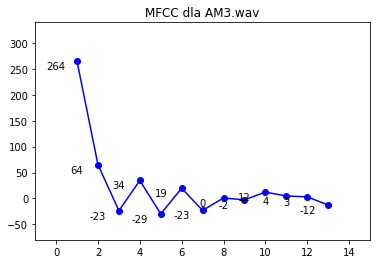

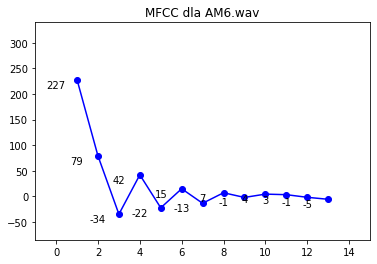

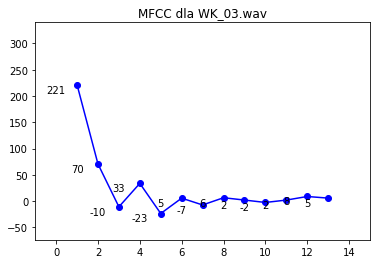

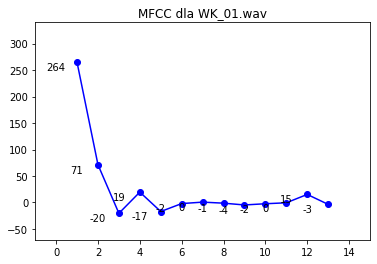

In [35]:
for sig in czterysygnaly:
    drawDiagram(sig["mfccs"], sig["name"])

In [28]:
def drawDiagram(cepstra, title):
    import matplotlib.pyplot as plt
 
    fig = plt.figure()
    ax = fig.add_subplot(111)

    x =[1,2,3,4,5,6,7,8,9,10,11,12,13]

    y = cepstra
    plt.plot(x, y, c ="blue")
    plt.scatter(x, y, c ="blue")

    for i,v in enumerate(y):
        ax.text(i, v, "%d" %v, ha="center", va="top")
    # To show the plot
    plt.title(f"MFCC dla {title}")
    plt.ylim(min(y)-50,340)
    plt.xlim(-1, 15)
    plt.show()
    fig.savefig(f'MFCC_{title}.png')